In [1]:
# import sys
# sys.path.append('/Users/125715/python/fluidlib')
import math as m
import matplotlib.pyplot as plt
import numpy as np
import conversion_library as c; 
import volume_calc as v
import mat_lib as mat
import thermal_solver as t
from scipy.integrate import solve_ivp
# from fluidlib import flow_prop_calc as f
import gc


REFPROP unavailable, defaulting to CoolProp


[[300.         305.15485326 310.00623884 ... 383.94296204 383.94140894
  383.93985873]
 [600.         597.03800447 594.15254802 ... 384.12170591 384.11988359
  384.11806582]
 [350.         349.94031027 349.88705734 ... 375.23974573 375.25152865
  375.26329188]
 [450.         446.79017364 443.75500918 ... 383.99687574 383.99562512
  383.99437774]
 [400.         399.8828241  399.77164243 ... 388.6428801  388.63702307
  388.63117201]
 [200.         201.19383427 202.42750418 ... 384.05583048 384.05453063
  384.05323382]]


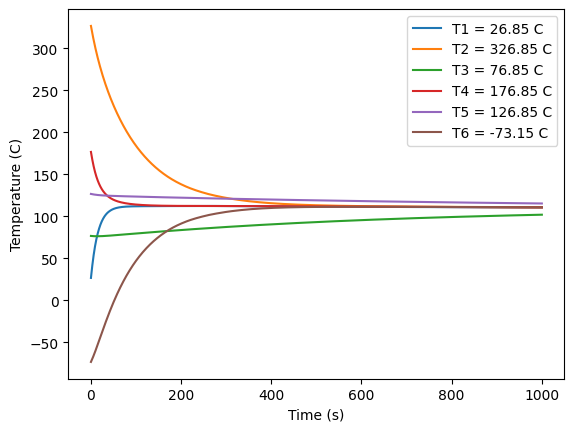

In [2]:
# import sys
# sys.path.append('/Users/125715/python/fluidlib')
import math as m
import matplotlib.pyplot as plt
import numpy as np
import conversion_library as c; 
import volume_calc as v
import mat_lib as mat
import thermal_solver as t
from scipy.integrate import solve_ivp
# from fluidlib import flow_prop_calc as f
import gc

node1 = t.Node(
    T = 300,
    order = 0,
    medium="SS316",
    medium_type="SOLID",
    V = 0.001
)
node5 = t.Node(
    T = 400,
    order =4,
    medium="SS316",
    medium_type="SOLID",
    V = 0.001 
)
node3 = t.Node(
    T = 350, 
    order = 2,
    medium="SS316", 
    medium_type="SOLID",
    V = 0.001
)

node4 = t.Node(
    T = 450, 
    order = 3, 
    medium = "Al6061", 
    medium_type="SOLID", 
    V = 0.003,
    e = 1, 
    Arad = 0.01,
)

node2 = t.Node(
    T = 600, 
    order =1, 
    medium= "NITROGEN", 
    medium_type="FLUID", 
    Pressure=101325,
    V = 0.02,
    isothermal=0,
)
node6 = t.Node(
    T = 200, 
    order = 5, 
    medium="Al6061",
    medium_type="SOLID", 
    V = 0.02,
)

a = t.Path(
    nodeA = node1,
    nodeB = node2,
    Acond=0.1,
    dx=.02
)
b = t.Path(
    nodeA = node1,
    nodeB= node3,
    Acond=0.1,
    dx = .3
)

d = t.Path(
    nodeA = node1, 
    nodeB = node4, 
    Acond= 0.1, 
    dx = 0.1,
)

e = t.Path(
    nodeA = node1,
    nodeB = node5, 
    Aconv = 0.1,
    h = 50
)
f = t.Path( 
    nodeA = node1,
    nodeB = node6,
    Acond = 0.1, 
    dx = 0.2
)
n = 6
paths = (a,b,d,e,f)
nodes = (node1, node2,node3,node4,node5, node6)
T = np.array([node1.T, node2.T, node3.T,node4.T,node5.T, node6.T])
t_span=[0,1000]
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = t.T_vs_t2(t_span, t_eval, T, paths,nodes)
print(sol.y)
for i in range(n):
    plt.figure(1)
    plt.plot(sol.t, sol.y[i]-273.15,label="T" + str(i+1) + " = " + str(round(sol.y[i,0]-273.15,2)) + " C")
    plt.xlabel("Time (s)") 
    plt.ylabel("Temperature (C)")
plt.legend()


In [3]:
VredTee = c.cmm2cin(833070.56)
VFlange = c.cmm2cin(31039.71)
print(VFlange)
V_cylinder = v.cylinder(1, 86.59)
print(str(V_cylinder) + " cu-in")
print(2*c.cmm2cin(34587.11))
print(V_cylinder + 4.22 + (3*2.06))
c.cintocm(78.41)*1000

1.8941593198147026
68.00762696858504 cu-in
4.221269899232713
78.40762696858505


1.2849096881290833

In [4]:
V_pipe = v.cylinder(1, 64.42)
V_Flange = v.cylinder(1.05, 2.438)*2 +2.32
V_tee = 3.54
V_elbow = 2.06*2
VTotal = V_pipe + V_Flange + V_tee + V_elbow
c.cintocm(VTotal)*1000



1.0618405382123053

In [5]:
cp=float(c.getFluidProperty(hOut='CPMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN'))
cv=c.getFluidProperty(hOut='CVMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN')
M = c.getFluidProperty(hOut='MOLARMASS', hIn='TD', val1=273, val2 = 0.082, hFLd='HYDROGEN')
print(M)
print(cp)


0.00201588
14196.48992953047


In [6]:
E = mat.getMatProp(mat.SS316, "E")*1e9
print(c.pa2psi(E))
k = mat.getMatProp(mat.SS316, "k")
print(k)
print(c.inch2m(6.25))
print(c.getFluidProperty(hOut= 'V', hIn='TD', val1= 375, val2= 0.082, hFLd='HYDROGEN'))
print(c.si2sm(76.404))

27992272.392367534
16.3
0.15875
1.0431405681397594e-05
0.04929280463999999


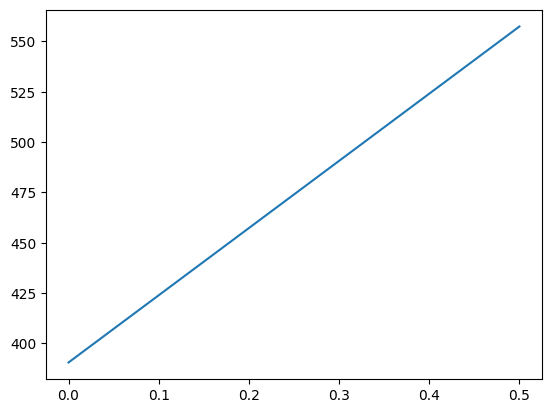

In [7]:
Tm_i = (273+508)/2
x = np.linspace(0,.5, 1000)
D=c.inch2m(.402)
qFlux = 59102 #W/m^2
P= m.pi*D
mdot = .0004 #kg/s
Tmx = Tm_i + qFlux*P/(mdot*14196)*x
plt.plot(x, Tmx)
